<a href="https://colab.research.google.com/github/avinash-vk/Sentiment-analysis-on-amazon-reviews/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing and importing

In [ ]:
# cleaned dataset location
URL = "/content/drive/MyDrive/datasets fragmented/coldropDS-50k_cleaned.csv"

In [ ]:
# Mount drive to access dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing necessary visualisation libraries

import torch #the pytorch library, used for modeling and formatting our data to be compatible in a pytorch environment
import pandas as pd #for dataframe reading, cleaning functions
from tqdm.notebook import tqdm #used as a progress bar

# Importing necessary libraries for basic visualization as well as word clouds
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer

# Using textblob to generate sentiment for easy visualization
from textblob import TextBlob

In [ ]:
# reading the dataset
df = pd.read_csv(URL)

In [ ]:
# Changes the overall category to categorical from numerical for easier visualizations
df["classes"] = df["overall"]
df["classes"].replace({5.0: "positive",4.0:"positive",3.0:"neutral",2.0:"negative",1.0:"negative"}, inplace=True)
df["classes"].unique()

array(['positive', 'negative', 'neutral'], dtype=object)

In [ ]:
# Dropping null values to have a cleaner dataset
df = df.dropna(subset=['cleaned_reviews'])

# Visualisations

### **Distribution of sentiment classes across the dataset**

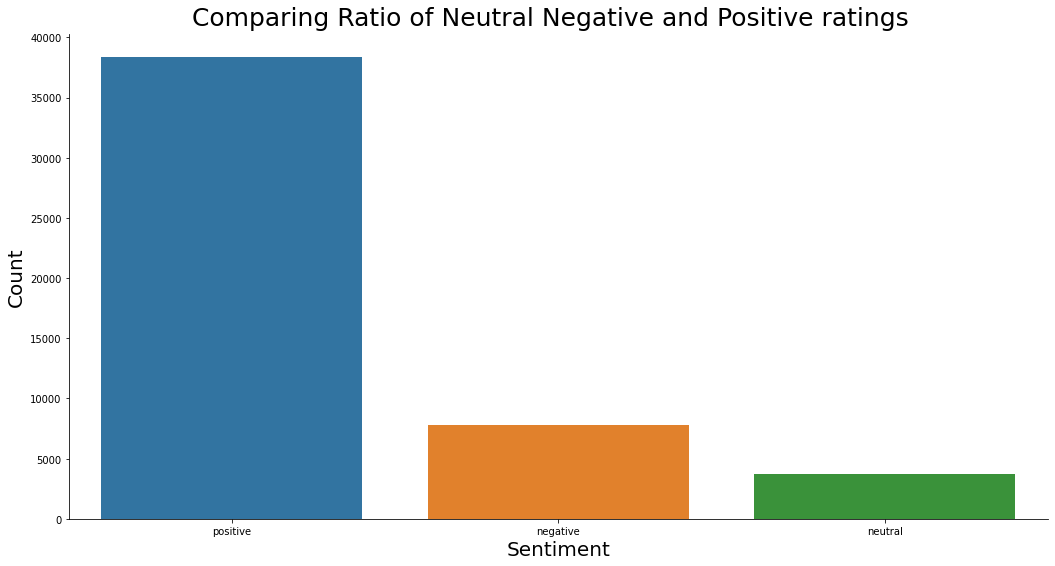

In [ ]:
# Distribution of sentiment class
fig, axes = plt.subplots(1, figsize=(15,8))
fig.suptitle("Comparing Ratio of Neutral Negative and Positive ratings", fontsize = 25)
plt.tight_layout(pad = 3.5)
sns.countplot(x = "classes", data = df)
axes.set_xlabel("Sentiment", fontsize = 20)
axes.set_ylabel("Count", fontsize = 20)
sns.despine()

In [ ]:
# Percentage of neutral, negative, positive words in train and test data
def pert_count(data, category):
    return (len(data[data["classes"] == category])/len(data)) * 100
print(f"Percentage of neutral words in train --> {pert_count(df, 'neutral')} %")
print(f"Percentage of negative words in train --> {pert_count(df, 'negative')} %")
print(f"Percentage of positive words in train --> {pert_count(df, 'positive')} %")

Percentage of neutral words in train --> 7.456439014620468 %
Percentage of negative words in train --> 15.681954736631285 %
Percentage of positive words in train --> 76.86160624874825 %


### **Words and word clouds**

In [ ]:
# Most repeated words in reviews
stopwords = set(STOPWORDS)
def word_cloud(data, title):
    wordcloud = WordCloud(
    background_color = "black",
    max_font_size = 40,
    max_words = 200,
    stopwords = stopwords,
    scale = 3).generate(str(data))
    fig = plt.figure(figsize = (7.5, 7.5))
    plt.axis("off")
    if title: 
        fig.suptitle(title, fontsize=15)
        fig.subplots_adjust(top=2.25)
    plt.imshow(wordcloud)
    plt.show()

In [ ]:
# seperating all records into a different variable to generate wordcloud based on category
neu=df[df["classes"] == "neutral"]["cleaned_reviews"]
neg=df[df["classes"] == "negative"]["cleaned_reviews"]
pos=df[df["classes"] == "positive"]["cleaned_reviews"]

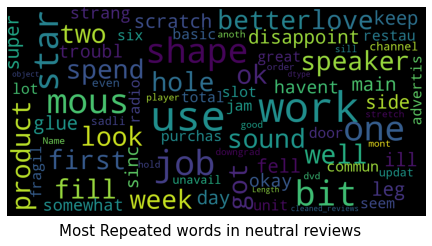

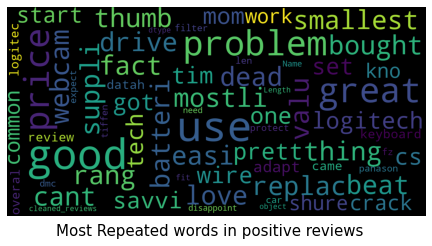

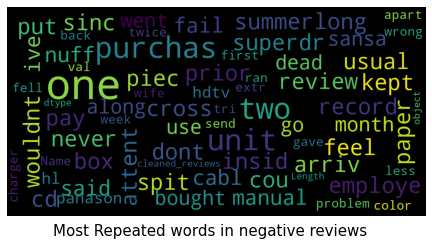

In [ ]:
# Generating wordcloud based on category
word_cloud(neu, "Most Repeated words in neutral reviews")
word_cloud(pos, "Most Repeated words in positive reviews")
word_cloud(neg, "Most Repeated words in negative reviews")

### **Most popular words in the dataset**

In [ ]:
# Function for bigram
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2),stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]# apply function above 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


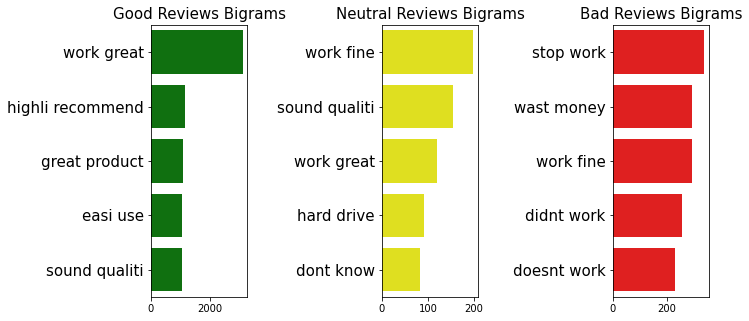

In [ ]:
# create a function for bigram plots
def n_gram_plot(data,title,color):
    x=[x[0] for x in data]
    y=[x[1] for x in data]
    sns.barplot(y,x,color='{}'.format(color))
    plt.title('{} Reviews Bigrams'.format(title),fontsize=15)
    plt.yticks(rotation=0,fontsize=15)

common_words_good = get_top_n_bigram(pos, 5)
common_words_neutral= get_top_n_bigram(neu, 5)
common_words_bad= get_top_n_bigram(neg, 5)

# bigram plot using function above
plt.figure(figsize=(10,5))
# good reviews bigrams
plt.subplot(151)
n_gram_plot(common_words_good,'Good','green')
#============================================= 
#neutral reviews bigrams
plt.subplot(153)
n_gram_plot(common_words_neutral,'Neutral','yellow')
#============================================= 
#bad reviews bigrams
plt.subplot(155)
n_gram_plot(common_words_bad,'Bad','red')
plt.show()

### **Sendiment distibutions**

In [ ]:
# calculating sentiment polarity using external libraries
df['sentiment'] = df['cleaned_reviews'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df.head()

,Unnamed: 0,overall,reviewText,summary,y,cleaned_reviews,classes,sentiment
0,0,5.0,love these things the supplied batteries were...,Good headset Replaced batteries,2,love thing suppli batteri dead replac,positive,0.150000
1,1,5.0,great value good range and easy to use,Five Stars,2,great valu good rang easi use,positive,0.750000
2,2,5.0,smallest thumb drive ever cant beat the price,Five Stars,2,smallest thumb drive ever cant beat price,positive,0.000000
3,3,5.0,i bought this webcam mostly because of the pri...,Not a bad webcam for the price.,2,bought webcam mostli price fact logitech prett...,positive,0.155790
4,4,5.0,i got this for my mom shes not the most tech ...,Good webcam,2,got mom she tech savvi set she problem one tim...,positive,0.372619


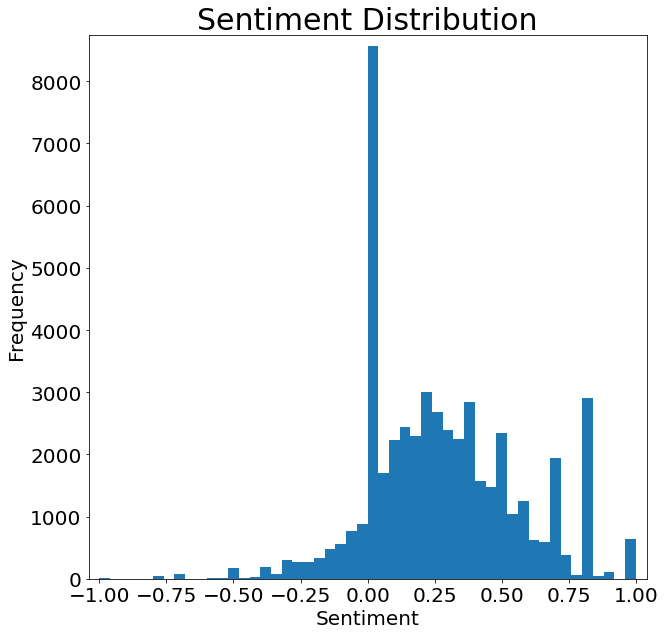

In [ ]:
#Barchart using to visualize the sentiment distribution generated above
plt.figure(figsize=(10,10))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.yticks(fontsize=20)
plt.hist(df['sentiment'], bins=50)
plt.title('Sentiment Distribution', fontsize=30)
plt.show()

We can conclude that there's more reviews that look neutral exist in our dataset than there are positive or negative reviews. We also see that people tend to put in reviews only when its positive or when its neutral and they barely bother to put up a review when its a really bad product.

### **Correlation heatmap to analyse the dependence between review length and sentiment**

It is a known fact that individuals tend to rant more about a product than they would praise a product. The following correlation heatmap further proves that face, there's a negative correlation between review length and the sendiment indicating negative reviews tend to be longer than positive or neutral ones.

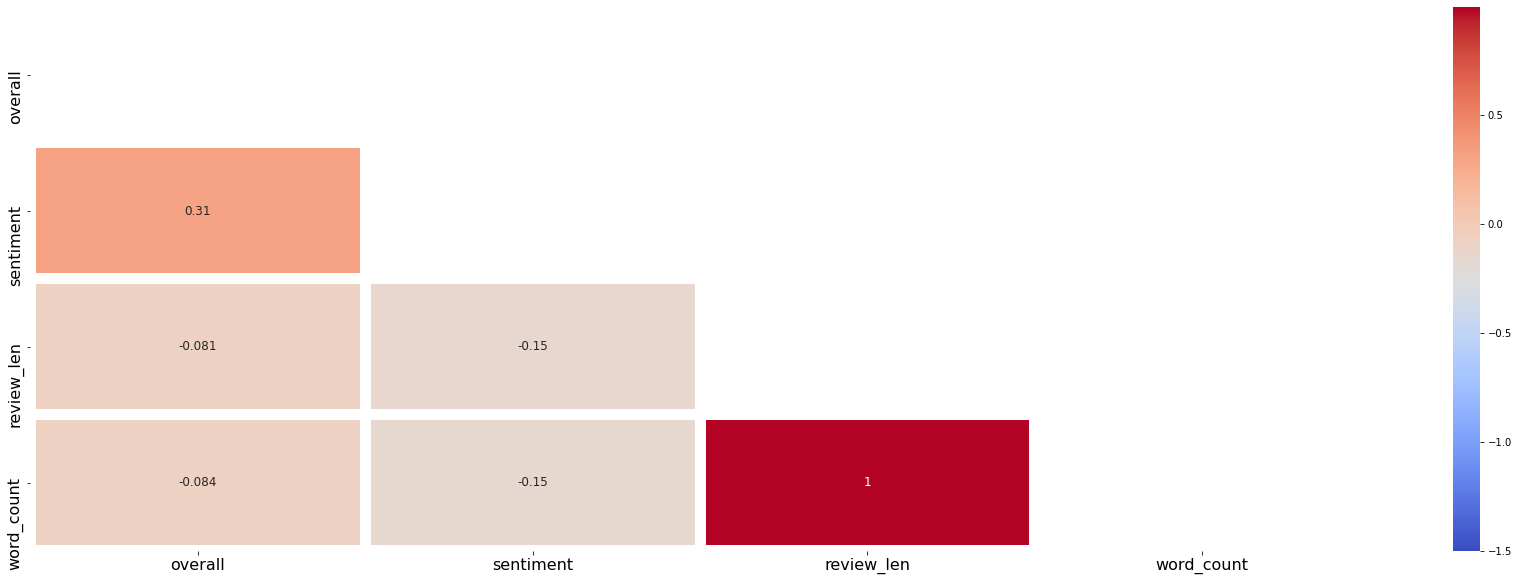

In [ ]:
# Heatmap from overall rating, review length, sentiment and word count

# calculating word count and review length
df['word_count'] = df["reviewText"].apply(lambda x: len(str(x).split(" ")))
df['review_len'] =df["reviewText"].apply(lambda x: len(str(x)))

# visualising the heatmap
correlation = df[['overall','sentiment', 'review_len', 'word_count']].corr()
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(30,10))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
sns.heatmap(correlation, cmap='coolwarm', annot=True, annot_kws={"size": 12}, linewidths=10, vmin=-1.5, mask=mask)